In [38]:

#imports
from sqlalchemy import create_engine
from datetime import timedelta, datetime, tzinfo
from zipfile import ZipFile
import collections
import pandas as pd
import numpy as np

In [39]:
#read in csvs
states_df = pd.read_csv("all-states-history.csv")

national_df = pd.read_csv("national-history.csv")

In [40]:
states_df.head(10)

,date,state,death,deathConfirmed,deathIncrease,hospitalized,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,3/7/21,AK,305.0,NaN,0,1293.0,33.0,56886.0,0,NaN,1731628.0,0
1,3/7/21,AL,10148.0,7963.0,-1,45976.0,494.0,499819.0,408,295690.0,2323788.0,2347
2,3/7/21,AR,5319.0,4308.0,22,14926.0,335.0,324818.0,165,315517.0,2736442.0,3380
3,3/7/21,AS,0.0,NaN,0,NaN,NaN,0.0,0,NaN,2140.0,0
4,3/7/21,AZ,16328.0,14403.0,5,57907.0,963.0,826454.0,1335,NaN,7908105.0,45110
5,3/7/21,CA,54124.0,NaN,258,NaN,4291.0,3501394.0,3816,NaN,49646014.0,133186
6,3/7/21,CO,5989.0,5251.0,3,23904.0,326.0,436602.0,840,NaN,6415123.0,38163
7,3/7/21,CT,7704.0,6327.0,0,12257.0,428.0,285330.0,0,NaN,6520366.0,0
8,3/7/21,DC,1030.0,NaN,0,NaN,150.0,41419.0,146,29570.0,1261363.0,5726
9,3/7/21,DE,1473.0,1337.0,9,NaN,104.0,88354.0,215,NaN,1431942.0,5867


In [41]:
national_df.head()

,date,death,deathIncrease,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease
0,3/7/21,515148.0,839,726,40212.0,878613.0,74582825.0,131835,28756184.0,41530,363824818,1169754
1,3/6/21,514309.0,1680,503,41401.0,877887.0,74450990.0,143835,28714654.0,60015,362655064,1430992
2,3/5/21,512629.0,2221,2781,42541.0,877384.0,74307155.0,271917,28654639.0,68787,361224072,1744417
3,3/4/21,510408.0,1743,1530,44172.0,874603.0,74035238.0,177957,28585852.0,65487,359479655,1590984
4,3/3/21,508665.0,2449,2172,45462.0,873073.0,73857281.0,267001,28520365.0,66836,357888671,1406795


KeyError: 'date'

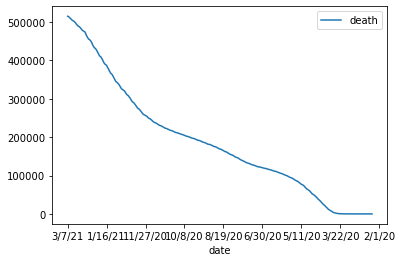

In [42]:
death = national_df.plot.line(x='date', y='death')

#we can loc for the past 3 months
date_df = national_df.set_index("date")
date_df.sort_values(by=['date'], inplace=True, ascending=False)
monthtrend_df = date_df.loc['01/01/21':'3/7/21']

trend=monthtrend_df.plot.line(x='date', y='death')


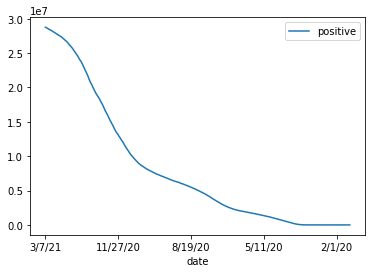

In [43]:
positive=national_df.plot.line(x='date', y='positive')

In [44]:
connection_string = "postgres:Osram919267%@localhost:5432/Covid19_Project2"
engine = create_engine(f'postgresql://{connection_string}')

In [45]:
#engine.table_names()

In [46]:
michigan_df = states_df.loc[states_df['state'] == "MI", :]

michigan_df

,date,state,death,deathConfirmed,deathIncrease,hospitalized,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
24,3/7/21,MI,16658.0,15666.0,0,NaN,866.0,656072.0,0,549881.0,10621967.0,0
80,3/6/21,MI,16658.0,15666.0,57,NaN,866.0,656072.0,1692,549881.0,10621967.0,37232
136,3/5/21,MI,16601.0,15610.0,12,NaN,866.0,654380.0,1791,541258.0,10584735.0,46112
192,3/4/21,MI,16589.0,15600.0,39,NaN,890.0,652589.0,1827,541258.0,10538623.0,46486
248,3/3/21,MI,16550.0,15563.0,6,NaN,882.0,650762.0,1705,541258.0,10492137.0,36453
304,3/2/21,MI,16544.0,15558.0,25,NaN,959.0,649057.0,1642,541258.0,10455684.0,19406
360,3/1/21,MI,16519.0,15534.0,11,NaN,893.0,647415.0,1865,541258.0,10436278.0,48387
416,2/28/21,MI,16508.0,15522.0,0,NaN,841.0,645550.0,0,541258.0,10387891.0,0
472,2/27/21,MI,16508.0,15522.0,70,NaN,841.0,645550.0,1425,541258.0,10387891.0,36981
528,2/26/21,MI,16438.0,15454.0,2,NaN,841.0,644125.0,1257,529080.0,10350910.0,41966


In [47]:
import psycopg2
import pandas as pd
import os
from io import StringIO
import sys

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
param_dic = {
    "host"      : "localhost",
    "database"  : "Covid19_Project2",
    "user"      : "postgres",
    "password"  : "Osram919267%"
}
db_url = {'drivername': 'postgresql+psycopg2',
        'username': 'postgres',
        'password': 'Osram919267%',
        'host': 'localhost',
        'port': 5432,
        'database': 'Covid19_Project2'
}
def connect(params_dic):
    '''Connect to the PostgreSQL database server'''
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        print("Connection not successful!")
        sys.exit(1)
    print("Connection Successful!")
    return conn
def execute_query(conn, query):
    """ Execute a single query """
    ret = 0 # Return value
    cursor = conn.cursor()
    try:
        cursor.execute(query)
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    # If this was a select query, return the result
    if 'select' in query.lower():
        ret = cursor.fetchall()
    cursor.close()
    return ret
def open_as_df(query,conn):
    '''pass query to get dataframe: select * from "5_min" '''
    try:
        df = pd.read_sql_query(sql = query,con = conn, index_col= ['date'])
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1)
    conn.close()
    return df
def copy_table_schema(existing_tb, new_tb):
    from sqlalchemy import create_engine, MetaData, Table
    from sqlalchemy.engine.url import URL
    engine = create_engine(URL(**db_url))
    engine._metadata = MetaData(bind=engine)
    engine._metadata.reflect(engine)
    sch_Table = Table(existing_tb, engine._metadata)
    new_Table = Table(new_tb, engine._metadata)
    # copy schema and create newTable from oldTable
    for column in sch_Table.columns:
        new_Table.append_column(column.copy())
    new_Table.create()
def copy_to_db(conn, df, table):
    """
    save the dataframe in memory and use copy_from() to copy it to the table in the db
    """
    # save dataframe to an object in memory buffer
    buffer = StringIO()
    df.to_csv(buffer, header=False, index = False)
    buffer.seek(0)
    cursor = conn.cursor()
    try:
        cursor.copy_from(buffer, table, sep=",")
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    print("Done!")
    cursor.close()
    conn.close()

In [48]:
execute_query(connect(param_dic), "select * from state_history;")

Connecting to the PostgreSQL database...
Connection Successful!


[(datetime.date(2021, 3, 7),
  'AK',
  305,
  None,
  0,
  1293,
  33,
  56886,
  0,
  None,
  1731628,
  0),
 (datetime.date(2021, 3, 7),
  'AL',
  10148,
  7963,
  -1,
  45976,
  494,
  499819,
  408,
  295690,
  2323788,
  2347),
 (datetime.date(2021, 3, 7),
  'AR',
  5319,
  4308,
  22,
  14926,
  335,
  324818,
  165,
  315517,
  2736442,
  3380),
 (datetime.date(2021, 3, 7),
  'AS',
  0,
  None,
  0,
  None,
  None,
  0,
  0,
  None,
  2140,
  0),
 (datetime.date(2021, 3, 7),
  'AZ',
  16328,
  14403,
  5,
  57907,
  963,
  826454,
  1335,
  None,
  7908105,
  45110),
 (datetime.date(2021, 3, 7),
  'CA',
  54124,
  None,
  258,
  None,
  4291,
  3501394,
  3816,
  None,
  49646014,
  133186),
 (datetime.date(2021, 3, 7),
  'CO',
  5989,
  5251,
  3,
  23904,
  326,
  436602,
  840,
  None,
  6415123,
  38163),
 (datetime.date(2021, 3, 7),
  'CT',
  7704,
  6327,
  0,
  12257,
  428,
  285330,
  0,
  None,
  6520366,
  0),
 (datetime.date(2021, 3, 7),
  'DC',
  1030,
  None,
  0,


In [49]:
connect(param_dic)

Connecting to the PostgreSQL database...
Connection Successful!


<connection object at 0x000001B5F8BE5D00; dsn: 'user=postgres password=xxx dbname=Covid19_Project2 host=localhost', closed: 0>

In [50]:
connection_string = "postgres:Osram919267%@localhost:5432/ETL_Project"
engine = create_engine(f'postgresql://{connection_string}')

In [51]:
df = open_as_df("select * from national_history;", connect(param_dic))

Connecting to the PostgreSQL database...
Connection Successful!


In [23]:
df

,death,deathincrease,hospitalezedincrease,hospitalizedcurrently,hospitalizedcumulative,negative,negativeincrease,positive,positiveincrease,totaltestresults,totaltestresultsincrease
date,,,,,,,,,,,
2021-03-07,515148.0,839,726,40212.0,878613.0,74582825.0,131835,28756184.0,41530,363824818,1169754
2021-03-06,514309.0,1680,503,41401.0,877887.0,74450990.0,143835,28714654.0,60015,362655064,1430992
2021-03-05,512629.0,2221,2781,42541.0,877384.0,74307155.0,271917,28654639.0,68787,361224072,1744417
2021-03-04,510408.0,1743,1530,44172.0,874603.0,74035238.0,177957,28585852.0,65487,359479655,1590984
2021-03-03,508665.0,2449,2172,45462.0,873073.0,73857281.0,267001,28520365.0,66836,357888671,1406795
2021-03-02,506216.0,1728,1871,46388.0,870901.0,73590280.0,255779,28453529.0,54248,356481876,1343519
2021-03-01,504488.0,1241,1024,46738.0,869030.0,73334501.0,118077,28399281.0,48092,355138357,1154440
2021-02-28,503247.0,1051,879,47352.0,868006.0,73216424.0,203599,28351189.0,54349,353983917,1408422
2021-02-27,502196.0,1847,1428,48871.0,867127.0,73012825.0,205090,28296840.0,71245,352575495,1655179


In [53]:
df2 = open_as_df("select * from state_history;", connect(param_dic))

Connecting to the PostgreSQL database...
Connection Successful!


In [33]:
#df2

In [65]:
states = df2.groupby(['state', 'death']).sum()
deathState = round(states.groupby(['state']).mean(),0)
deathState

,deathconfirmed,deathincrease,hospitalized,hospitalizedcurrently,positive,positiveincrease,recovered,totaltestresults,totaltestresultsincrease
state,,,,,,,,,
AK,127.0,3.0,1383.0,156.0,54019.0,499.0,4231.0,1826471.0,15190.0
AL,2859.0,32.0,19534.0,1290.0,197647.0,1592.0,100896.0,1166489.0,7401.0
AR,1513.0,17.0,6509.0,607.0,121362.0,1047.0,109186.0,1188823.0,8825.0
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,444489.0,2140.0
AZ,5122.0,49.0,22233.0,1919.0,285821.0,2474.0,0.0,2751572.0,23676.0
CA,0.0,151.0,0.0,7412.0,1058938.0,9780.0,0.0,16294356.0,138673.0
CO,2240.0,18.0,10415.0,692.0,147945.0,1307.0,0.0,2106013.0,19206.0
CT,4719.0,30.0,13858.0,831.0,130303.0,1106.0,5782.0,3016531.0,25264.0
DC,0.0,4.0,0.0,228.0,23359.0,160.0,15324.0,597167.0,4869.0


In [1]:
import matplotlib.pyplot as plt
import geopandas

ModuleNotFoundError: No module named 'geopandas'